The objective of this script is to rerun the necessary analyses using this cleaned dataframe. 


The cleaned dataframe (instacart_LAST_2) was prepared through correcting anomalies in the 'prices' column of instacart_LAST dataframe.


The specific anomaly addressed is the presence of unusually high values (greater than 100) in the 'prices' column, which are not realistic for the context of this dataset.

### Data Cleaning Steps for instacart_LAST dataframe

Identifying and Correcting Anomalies in 'prices' column:

The 'prices' column was inspected for values greater than 100, which were deemed unrealistic.

These anomalous values were converted to NaN (Not a Number) to exclude them from the analysis.

The code used for this operation:

instacart_LAST.loc[instacart_LAST['prices'] > 100, 'prices'] = np.nan

Exporting the Cleaned DataFrame:

After cleaning the data, the updated DataFrame was exported as instacart_LAST_2 for use in subsequent analyses.

### Next steps

The cleaned DataFrame (instacart_LAST_2) will be used to rerun the necessary analyses. These analyses specifically include those that involve the 'prices' column. By ensuring that the 'prices' column contains realistic values, we enhance the accuracy and reliability of our results. This step is crucial as any analysis involving 'prices' directly influences the insights and decisions derived from the dataset.

By implementing this data cleaning step and exporting the cleaned DataFrame, we improve the quality and integrity of our dataset, thereby enhancing the overall validity of our subsequent analyses.

## This notebook contains the following:

### 1. Importing libraries and data

### 2. Checking the new dataframe and creating a new dataframe with only relevant columns

### 3. Determining whether there’s a difference in spending habits between the different U.S. regions

### 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

4.1 Aggregating by generation

4.2 Aggregating by income

4.3 Aggregating by dependant status

### 5. Are there differences in ordering habits based on a customers' loyalty status?

5.1 Distribution of loyalty groups

### 6. Are there differences in ordering habits based on a customer's region?

6.1 Distribution of regions

### 1. Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
#Creating a path
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'

In [3]:
#Importing data
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'instacart_LAST_2.pkl')
instacart_LAST_2 = pd.read_pickle(file_path)

### 2. Checking the new dataframe and creating a new dataframe with only relevant columns

In [4]:
#Check 'prices' column
instacart_LAST_2['prices'].describe()

count    3.095969e+07
mean     7.790590e+00
std      4.240595e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [5]:
print(instacart_LAST_2.columns)

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'order_number', 'order_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_indicator', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spender_flag', 'purchase_frequency',
       'frequency_flag', 'region', 'exclusion_flag', 'generation',
       'income_group', 'department', 'category', 'dependants_flag'],
      dtype='object')


In [6]:
# Create a new dataframe with only relevant columns
user_sample = instacart_LAST_2[['user_id', 'generation', 'income_group', 'department', 'category', 'dependants_flag', 'region', 'loyalty_flag', 'spender_flag', 'prices', 'days_since_prior_order', 'max_order', 'order_number' ]]

In [7]:
user_sample.head()

,user_id,generation,income_group,department,category,dependants_flag,region,loyalty_flag,spender_flag,prices,days_since_prior_order,max_order,order_number
0,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender,9.0,30.0,8,5
1,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender,9.0,11.0,8,7
2,26711,Gen X,Upper Middle Income,beverages,Beverages,With Dependants,Midwest,New customer,Low spender,9.0,10.0,8,8
3,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender,4.3,7.0,8,1
4,26711,Gen X,Upper Middle Income,produce,Fresh Foods,With Dependants,Midwest,New customer,Low spender,4.3,30.0,8,3


### 3. Determining whether there’s a difference in spending habits between the different U.S. regions

In [8]:
# Create a crosstab to compare regions with spender flags
region_spender_crosstab = pd.crosstab(user_sample['region'], user_sample['spender_flag'],dropna = False)

In [9]:
# Display the crosstab
print(region_spender_crosstab)

spender_flag  High spender  Low spender
region                                 
Midwest             148678      7112835
Northeast           103120      5361565
South               199339     10111800
West                152288      7774939


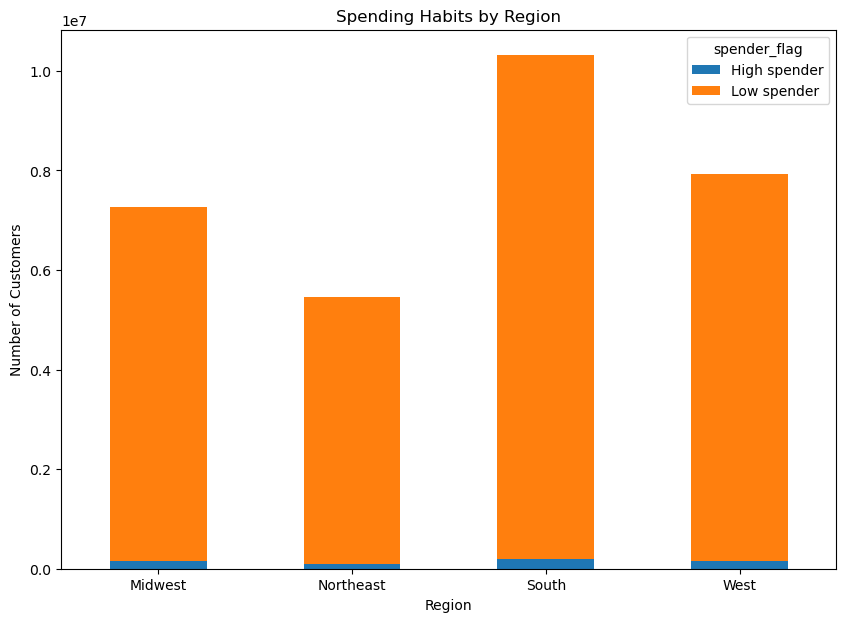

In [11]:
# Plotting the crosstab
region_spender_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7))

# Adding labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Spending Habits by Region')

# Set the x-axis labels to be horizontal
plt.xticks(rotation=0)

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'spending_habits_by_region.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

## 4. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [14]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_subset = user_sample.groupby(['user_id', 'generation', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [15]:
#Check the subset
orders_subset

,user_id,generation,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,prices
0,1,Millennials,Low Income,With Dependants,New customer,South,1,7.0,31.6
1,1,Millennials,Low Income,With Dependants,New customer,South,2,15.0,35.4
2,1,Millennials,Low Income,With Dependants,New customer,South,3,21.0,28.2
3,1,Millennials,Low Income,With Dependants,New customer,South,4,29.0,26.0
4,1,Millennials,Low Income,With Dependants,New customer,South,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,9,22.0,26.2
3064371,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,10,29.0,64.7
3064372,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,11,30.0,56.1
3064373,206209,Baby Boomers,Upper Middle Income,With Dependants,Regular customer,Midwest,12,18.0,131.5


### 4.1 Aggregating by generation

In [49]:
# max, min, mean by generation category
aggregations_by_gen = orders_subset.groupby('generation').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

# Reorder the index to ensure the desired order
ordered_generations = ['75+', 'Baby Boomers', 'Gen X', 'Millennials', 'Gen Z']
aggregations_by_gen = aggregations_by_gen.reindex(ordered_generations)

# Define the file path for exporting the DataFrame to Excel
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'aggregations_by_generation.xlsx')

# Export the aggregation to an Excel file
aggregations_by_gen.to_excel(file_path, index=True)

# Check the aggregation
aggregations_by_gen

days_since_prior_order                  prices                   
                                min       mean   max    min       mean     max
generation                                                                    
75+                             0.0  10.193719  30.0    0.0  78.203324   664.1
Baby Boomers                    0.0  10.207827  30.0    0.0  78.626555  1092.2
Gen X                           0.0  10.187542  30.0    0.0  78.466058  1047.4
Millennials                     0.0  10.243533  30.0    0.0  79.117188   829.2
Gen Z                           0.0  10.173742  30.0    0.0  79.112302   842.1

### 4.2 Aggregating by income

In [47]:
# max, min, mean by income group
aggregations_by_income = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})
# Reorder the index 
ordered_income_groups = ['High Income', 'Upper Middle Income', 'Middle Income', 'Low Income']
aggregations_by_income = aggregations_by_income.reindex(ordered_income_groups)

# Define the file path for exporting the DataFrame to Excel
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'aggregations_by_income.xlsx')

# Export the aggregation to an Excel file
aggregations_by_income.to_excel(file_path, index=True)

# Check the aggregation
aggregations_by_income

days_since_prior_order                  prices             \
                                       min       mean   max    min       mean   
income_group                                                                    
High Income                            0.0   9.094227  30.0    0.0  88.723763   
Upper Middle Income                    0.0  10.106153  30.0    0.0  83.712856   
Middle Income                          0.0  10.170750  30.0    0.0  79.992761   
Low Income                             0.0  10.969615  30.0    1.0  49.434370   

                             
                        max  
income_group                 
High Income          1047.4  
Upper Middle Income   846.1  
Middle Income        1092.2  
Low Income            875.0

### 4.3 Aggregating by dependant status

In [20]:
# max, min, mean by dependance flag
aggregations_by_dependants = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})

# Define the file path for exporting the DataFrame to Excel
file_path = os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'aggregations_by_dependants.xlsx')

# Export the aggregation to an Excel file
aggregations_by_dependants.to_excel(file_path, index=True)

# Check the aggregation
aggregations_by_dependants

days_since_prior_order                  prices             \
                                   min       mean   max    min       mean   
dependants_flag                                                             
No Dependants                      0.0  10.198976  30.0    0.0  78.514072   
With Dependants                    0.0  10.208390  30.0    0.0  78.774314   

                         
                    max  
dependants_flag          
No Dependants     875.0  
With Dependants  1092.2

### 5. Are there differences in ordering habits based on a customers' loyalty status?

In [21]:
# Group the data by 'loyalty_flag' and calculate the mean of 'prices' for each group
product_avg_cost = user_sample.groupby('loyalty_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [22]:
#Check the table
product_avg_cost

,loyalty_flag,prices
0,New customer,7.801665
1,Regular customer,7.798262
2,Loyal customer,7.773575


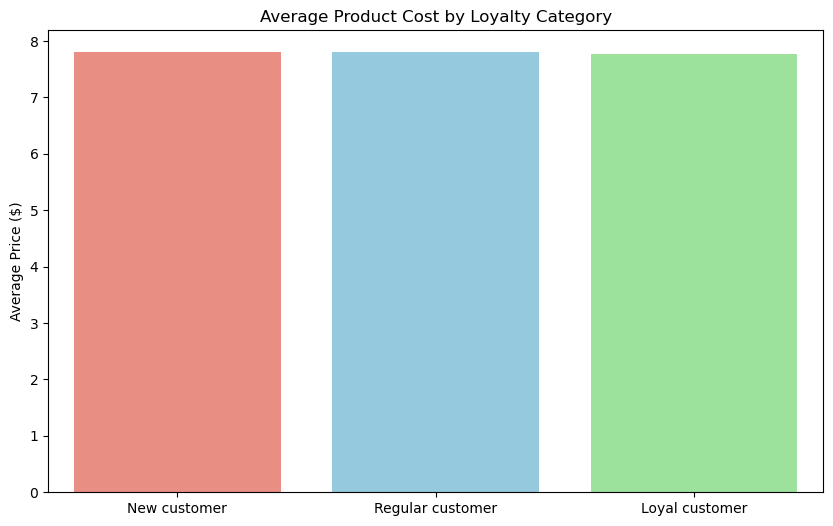

In [23]:
#Assign colors to each bar
colors = ['salmon', 'skyblue', 'lightgreen']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_flag', y='prices', data=product_avg_cost, palette=colors)

# Adding title and labels
plt.title('Average Product Cost by Loyalty Category')
plt.xlabel('')
plt.ylabel('Average Price ($)')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'average_product_cost_by_loyalty_category.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

In [24]:
# Group the data by 'loyalty_flag' and calculate the sumof 'prices' for each group
product_total_cost = user_sample.groupby('loyalty_flag')['prices'].sum().sort_values(ascending = False).reset_index()

In [25]:
#Check the table
product_total_cost

,loyalty_flag,prices
0,Regular customer,123790606.2
1,Loyal customer,79933825.2
2,New customer,37469804.2


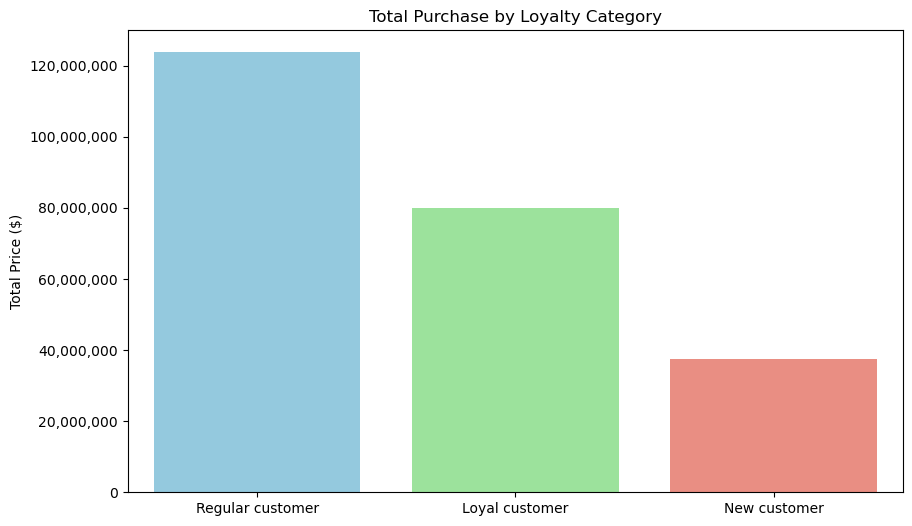

In [26]:
#Assign colors to each bar
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='loyalty_flag', y='prices', data=product_total_cost, palette=colors)

# Adding title and labels
plt.title('Total Purchase by Loyalty Category')
plt.xlabel('')
plt.ylabel('Total Price ($)')

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))


#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'total_purchase_cost_by_loyalty_category.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

#### 5.1 Distribution of loyalty groups

In [35]:
# Count the occurrences of each loyalty group
income_counts = user_sample['loyalty_flag'].value_counts()

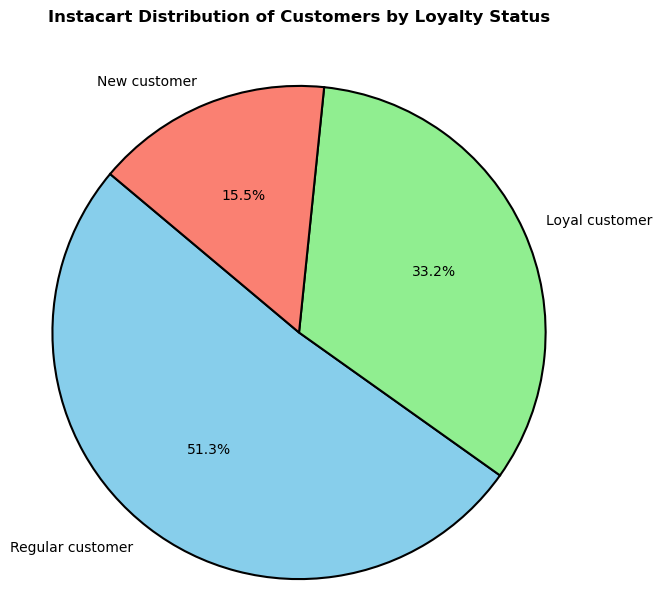

In [39]:
#Assign colors to each bar
colors = ['skyblue', 'lightgreen', 'salmon']

# Plot the pie chart
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    income_counts, 
    labels=income_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)
plt.title('Instacart Distribution of Customers by Loyalty Status', pad=30, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'distribution_by_loyalty_category.png'), bbox_inches = 'tight')



# Show the plot
plt.show()

### 6. Are there differences in ordering habits based on a customer's region?

In [27]:
# Group the data by 'region' and calculate the mean of 'prices' for each group
product_avg_cost_2 = user_sample.groupby('region')['prices'].mean().sort_values(ascending = False).reset_index()

In [28]:
#Check the table
product_avg_cost_2

,region,prices
0,South,7.794439
1,Midwest,7.792318
2,West,7.790308
3,Northeast,7.781441


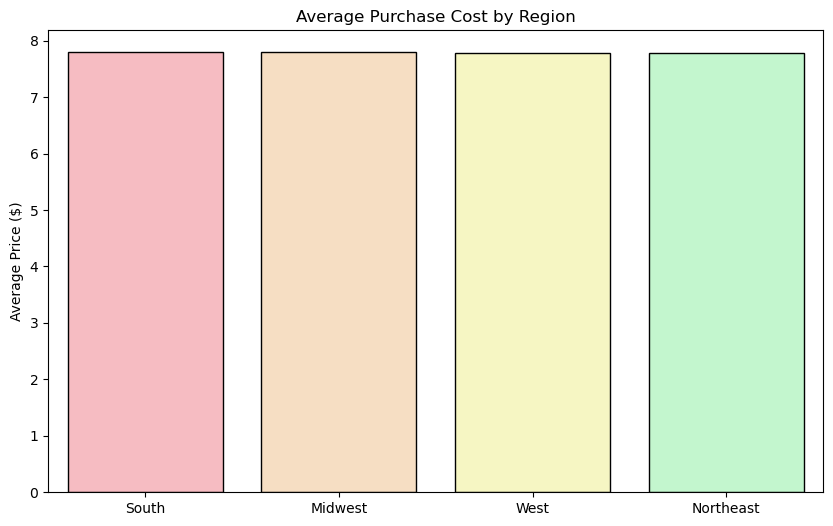

In [30]:

# Define colors
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#cba6f7']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='prices', data=product_avg_cost_2, palette=pastel_colors, edgecolor='black')

# Adding title and labels
plt.title('Average Purchase Cost by Region')
plt.xlabel('')
plt.ylabel('Average Price ($)')

#Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'average_purchase_cost_by_region.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

In [32]:
# Group the data by 'region' and calculate the sum of 'prices' for each group
product_total_cost = user_sample.groupby('region')['prices'].sum().sort_values(ascending = False).reset_index()

In [33]:
#Check the table
product_total_cost

,region,prices
0,South,80356321.2
1,West,61746425.9
2,Midwest,56574613.8
3,Northeast,42516874.7


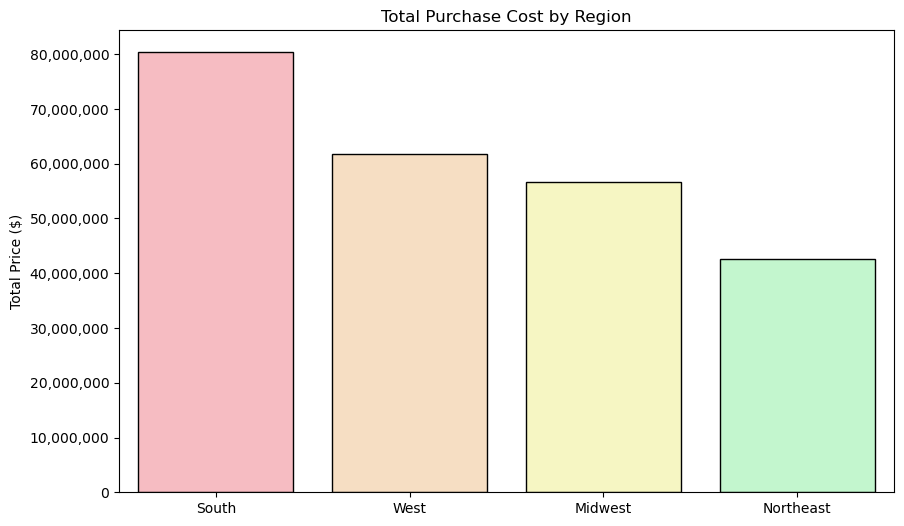

In [34]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='prices', data=product_total_cost, palette=pastel_colors, edgecolor='black')

# Adding title and labels
plt.title('Total Purchase Cost by Region')
plt.xlabel('')
plt.ylabel('Total Price ($)')

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'total_purchase_cost_by_region.png'), bbox_inches = 'tight')


# Display the plot
plt.show()

#### 6.1 Distribution of regions

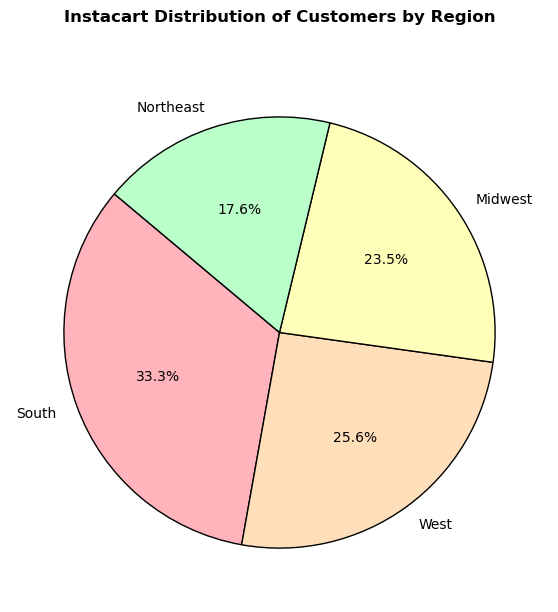

In [43]:
# Calculate the distribution of customers by region
region_distribution = user_sample['region'].value_counts(normalize=True) * 100

# Create a DataFrame for plotting
region_distribution_df = region_distribution.reset_index()
region_distribution_df.columns = ['Region', 'Percentage']

# Define colors
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff', '#cba6f7']

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(region_distribution_df['Percentage'], labels=region_distribution_df['Region'], autopct='%1.1f%%', startangle=140, colors=pastel_colors, wedgeprops={'edgecolor': 'black'})

# Adding title
plt.title('Instacart Distribution of Customers by Region', pad=30, fontweight='bold')

# Save the chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'new', 'distribution_of_customers_by_region_pie.png'), bbox_inches='tight')


# Display the plot
plt.show()